In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/lenovo/Desktop/Machine Learning/Dataset/laptop_price - dataset.csv")
data.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [3]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [4]:
data.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [5]:
data.dtypes

Company                 object
Product                 object
TypeName                object
Inches                 float64
ScreenResolution        object
CPU_Company             object
CPU_Type                object
CPU_Frequency (GHz)    float64
RAM (GB)                 int64
Memory                  object
GPU_Company             object
GPU_Type                object
OpSys                   object
Weight (kg)            float64
Price (Euro)           float64
dtype: object

In [6]:
X = data[[ 'Inches', 'CPU_Frequency (GHz)', 'RAM (GB)' ,'Weight (kg)']]
y = data['Price (Euro)']

In [7]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

In [8]:
X_train

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg)
155,15.6,1.60,6,1.91
718,14.0,1.92,4,1.40
867,13.3,2.70,8,1.37
771,15.0,2.70,16,1.71
1181,15.6,2.70,6,1.54
...,...,...,...,...
1044,14.0,2.30,4,1.54
1095,15.6,2.50,8,2.40
1130,15.6,2.70,8,2.04
860,15.6,2.50,8,2.30


In [9]:
y_train

155      619.00
718      265.00
867     1950.00
771     1799.00
1181     831.00
         ...   
1044    1000.00
1095     799.00
1130     629.00
860      850.66
1126     479.00
Name: Price (Euro), Length: 1255, dtype: float64

In [10]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [13]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [14]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [15]:
np.mean(mse)

np.float64(-199569.81270908265)

In [16]:
reg_pred=regression.predict(X_test)

In [17]:
reg_pred

array([ 657.78153667, 1070.12242717, 1426.92869318,  796.12841614,
       1099.70882284, 1109.25725464, 1067.28251079,  411.86022053,
       1981.34917067,  445.90255104, 1268.67464569,  949.49846705,
       1233.68061167, 1414.70007738, 2063.7060694 , 1104.16475768,
       1027.30725818, 1206.29174922, 1361.51835678, 1925.98200915])

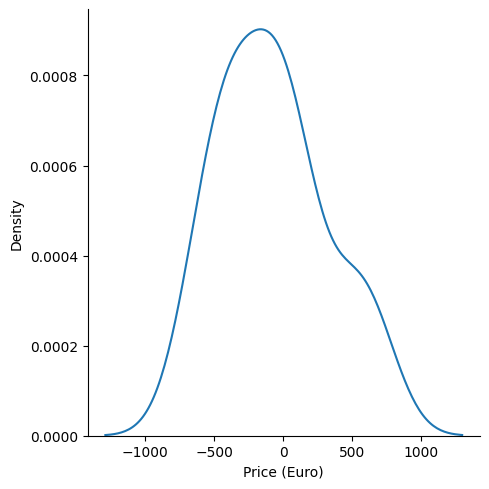

In [18]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [19]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.22465167780917095

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_regressor = Ridge()
ridge_regressor

Ridge()

In [21]:
parameters = { 'alpha' :[0.5, 1,2,3,4,5,6,7,8,9, 10, 20, 30, 40, 50, 60, 70]}
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                   40, 50, 60, 70]},
             scoring='neg_mean_squared_error')

In [22]:
print(ridgecv.best_params_)

{'alpha': 30}


In [23]:
print(ridgecv.best_score_)

-200154.61241527746


In [24]:
ridge_pred = ridgecv.predict(X_test)

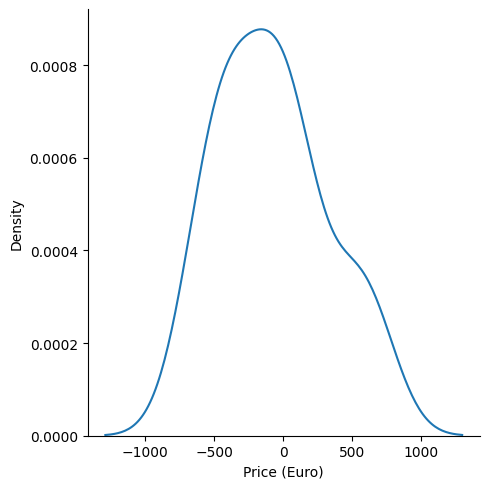

In [25]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [26]:
from sklearn.metrics import r2_score
score=r2_score(ridge_pred,y_test)
score

0.1694820760594088